# Customer Retention Analysis: Customer Churn Prediction

- **Objective**: Develop a model to predict customer behavior to retain customers.
- **Dataset**: The dataset contains customer demographics, usage patterns, and churn status <https://www.kaggle.com/datasets/blastchar/telco-customer-churn>.
- **Task**: Build a classification model to predict customer churn. Manage class imbalance, perform feature engineering, and evaluate model performance using metrics such as precision, recall, F1-score, and ROC-AUC. Additionally, identify customer segments at highest risk, determine key churn drivers, and provide actionable recommendations for reducing churn.

**References**: 
- https://scikit-learn.org/stable/user_guide.html
- https://seaborn.pydata.org/archive/0.11/index.html

## 1. Libraries and Data Loading


In [ ]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve, roc_auc_score, confusion_matrix, classification_report, roc_curve, recall_score, precision_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
import joblib


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


Download the data via Kaggle API:
`kaggle datasets download -d blastchar/telco-customer-churn`

In [ ]:
# Unzip the dataset
# if not os.path.exists('telco-customer-churn.csv.zip'):
# 	!kaggle datasets download -d blastchar/telco-customer-churn

# with zipfile.ZipFile('telco-customer-churn.zip', 'r') as zip_ref:
# 	zip_ref.extractall()
# 	os.rename('WA_Fn-UseC_-Telco-Customer-Churn.csv', 'telco-customer-churn.csv')


#### Data Description
According to the Kaggle data card, the dataset described below contains information about customers of a telecommunications company, including their demographics, services subscribed to, and whether they have churned (left the company).

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents



## 2. Data Exploration

In [ ]:
df = pd.read_csv('telco-customer-churn.csv')


In [ ]:
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#### Demographics

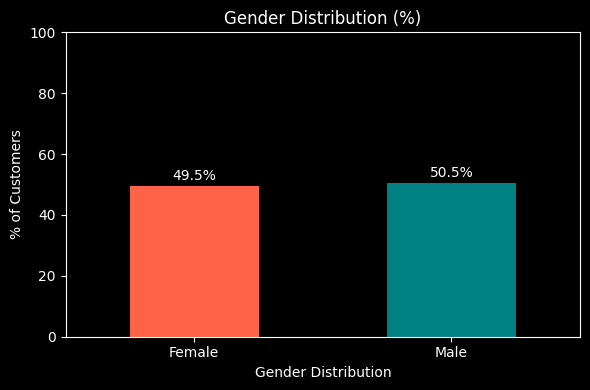

In [ ]:
# Gender distribution as percentage
gender_percent = df['gender'].value_counts(normalize=True).sort_index() * 100

fig, ax = plt.subplots(figsize=(6, 4))
gender_percent.plot(kind='bar', ax=ax, rot=0, color=['tomato', 'teal'])
plt.xlabel('Gender Distribution')
plt.ylabel('% of Customers')
plt.ylim(0, 100)

# Show percentage on each bar
for i, percent in enumerate(gender_percent):
    ax.text(i, percent + 1, f"{percent:.1f}%", ha='center', va='bottom')
plt.title('Gender Distribution (%)')
plt.tight_layout()
plt.show()


Customers by gender is evenly distributed.

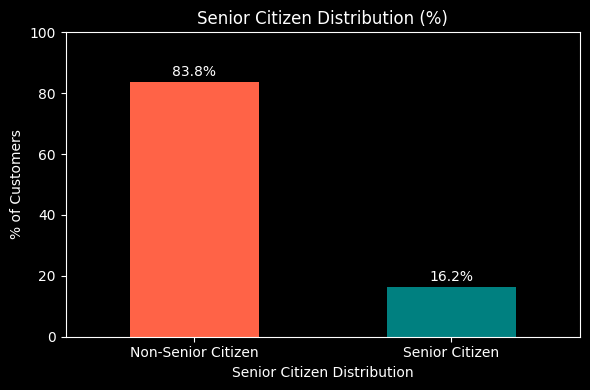

In [ ]:
# Senior Citizens distribution
senior_percent = df['SeniorCitizen'].value_counts(
    normalize=True).sort_index() * 100

fig, ax = plt.subplots(figsize=(6, 4))
senior_percent.plot(kind='bar', ax=ax, rot=0, color=['tomato', 'teal'])
plt.xlabel('Senior Citizen Distribution')
plt.ylabel('% of Customers')
plt.ylim(0, 100)

# Show percentage on each bar
for i, percent in enumerate(senior_percent):
    ax.text(i, percent + 1, f"{percent:.1f}%", ha='center', va='bottom')

plt.xticks(ticks=[0, 1], labels=['Non-Senior Citizen', 'Senior Citizen'])
plt.title('Senior Citizen Distribution (%)')
plt.tight_layout()
plt.show()


There are only 16% of the customers are senior citizens.  The most of the customers are younger customers.

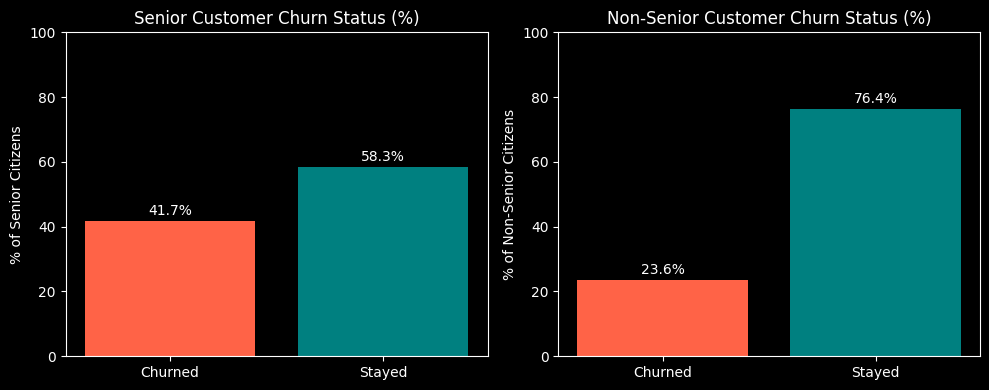

<Figure size 640x480 with 0 Axes>

Percentage of senior customers who churned: 41.7%


In [ ]:
# Percentage of senior citizens who churned
senior_churned_percent = (df[(df['SeniorCitizen'] == 1) & (
    df['Churn'] == 'Yes')].shape[0] / df[df['SeniorCitizen'] == 1].shape[0]) * 100
senior_stayed_percent = 100 - senior_churned_percent

# Percentage of non-senior citizens who churned
nonsenior_churned_percent = (df[(df['SeniorCitizen'] == 0) & (
    df['Churn'] == 'Yes')].shape[0] / df[df['SeniorCitizen'] == 0].shape[0]) * 100
nonsenior_stayed_percent = 100 - nonsenior_churned_percent

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Senior customers churn chart
axes[0].bar(['Churned', 'Stayed'],
            [senior_churned_percent, senior_stayed_percent],
            color=['tomato', 'teal'])
axes[0].set_ylabel('% of Senior Citizens')
axes[0].set_title('Senior Customer Churn Status (%)')
axes[0].set_ylim(0, 100)
for i, v in enumerate([senior_churned_percent, senior_stayed_percent]):
    axes[0].text(i, v + 1, f"{v:.1f}%", ha='center', va='bottom')

# Non-senior customers churn chart
axes[1].bar(['Churned', 'Stayed'],
            [nonsenior_churned_percent, nonsenior_stayed_percent],
            color=['tomato', 'teal'])
axes[1].set_ylabel('% of Non-Senior Citizens')
axes[1].set_title('Non-Senior Customer Churn Status (%)')
axes[1].set_ylim(0, 100)
for i, v in enumerate([nonsenior_churned_percent, nonsenior_stayed_percent]):
    axes[1].text(i, v + 1, f"{v:.1f}%", ha='center', va='bottom')

plt.tight_layout()
plt.show()
bars = ax.bar(['Senior Customers Churned', 'Senior Customers Stayed',
               'Non-Senior Customers Churned', 'Non-Senior Customers Stayed'],
              [senior_churned_percent, senior_stayed_percent,
               nonsenior_churned_percent, nonsenior_stayed_percent],
              color=['tomato', 'teal', 'tomato', 'teal'])


ax.set_ylabel('% of Senior Citizens')
ax.set_title('Senior Citizens Churn Status (%)')
for i, v in enumerate([senior_churned_percent, senior_stayed_percent, nonsenior_churned_percent, nonsenior_stayed_percent]):
    ax.text(i, v + 1, f"{v:.1f}%", ha='center', va='bottom')
plt.tight_layout()
plt.show()

print(
    f"Percentage of senior customers who churned: {senior_churned_percent:.1f}%")


While the senior customers accounts 16% of the total customers, senior customers are more likely to churn comparing to non-senior customers.

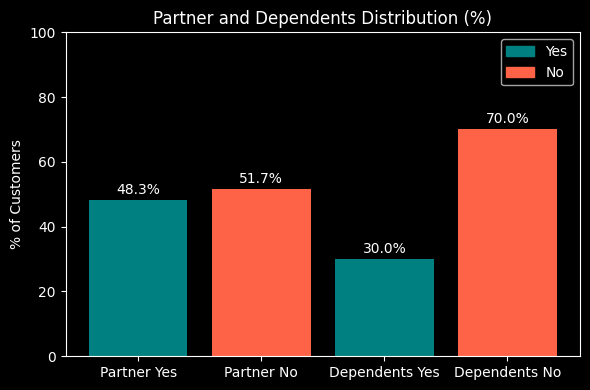

In [ ]:
# Partner and Dependents distribution in one chart
partner_order = ['Yes', 'No']
dependents_order = ['Yes', 'No']

partner_percent = df['Partner'].value_counts(
    normalize=True).sort_index() * 100
dependents_percent = df['Dependents'].value_counts(
    normalize=True).sort_index() * 100

partner_percent_ordered = partner_percent[partner_order]
dependents_percent_ordered = dependents_percent[dependents_order]

labels = ['Partner Yes', 'Partner No', 'Dependents Yes', 'Dependents No']
values = [
    partner_percent_ordered['Yes'], partner_percent_ordered['No'],
    dependents_percent_ordered['Yes'], dependents_percent_ordered['No']
]

colors = ['teal', 'tomato', 'teal', 'tomato']

fig, ax = plt.subplots(figsize=(6, 4))
bars = ax.bar(labels, values, color=colors)

# Show % above each bar
for i, bar in enumerate(bars):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 1,
            f"{height:.1f}%", ha='center', va='bottom')

ax.set_ylabel('% of Customers')
ax.set_ylim(0, 100)
ax.set_title('Partner and Dependents Distribution (%)')

# Custom legend for Yes/No
legend_handles = [
    plt.Rectangle((0, 0), 1, 1, color='teal', label='Yes'),
    plt.Rectangle((0, 0), 1, 1, color='tomato', label='No')
]
ax.legend(handles=legend_handles)
plt.tight_layout()
plt.show()


Customers who have partner and don't have partner are evenly distributed, while customers who don't have dependents are 70% of the total customers.  I created a new feature for the customers who don't have a partner and don't have dependents (Single) below on to see if it has any impact on churn.

Percentage of customers who don't have partner and don't have dependents (Single): 46.6%


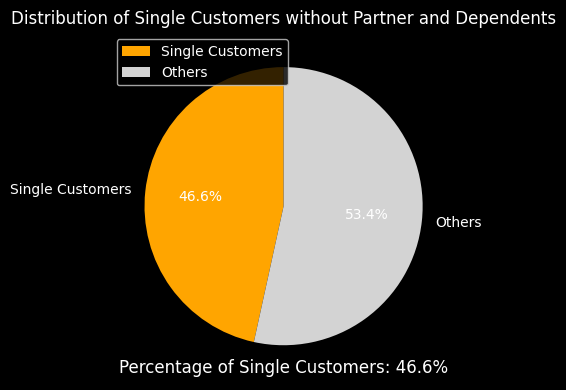

Total number of single customers: 3280
Number of single customers who churned: 1123
Churn rate for single customers: 34.2%


In [ ]:
# Filter customers who don't have partner and don't have dependents
single = df[(
    df['Partner'] == 'No') & (df['Dependents'] == 'No')]
# Calculate the percentage of customers who don't have partner and don't have dependents
single_percent = (len(single) / len(df))
print(
    f"Percentage of customers who don't have partner and don't have dependents (Single): {single_percent * 100:.1f}%")

# Plot the distribution of customers who don't have partner and don't have dependents

plt.figure(figsize=(6, 4))
plt.pie(
    [single_percent, 1 - single_percent],
    labels=[
        "Single Customers",
        "Others"
    ],
    colors=['orange', 'lightgray'],
    autopct=lambda pct: f"{pct:.1f}%" if pct > 0 else "",
    startangle=90
)
plt.title("Distribution of Single Customers without Partner and Dependents")
plt.text(
    0, -1.2, f"Percentage of Single Customers: {single_percent * 100:.1f}%", ha='center', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

# Create Single column in df
df['Single'] = ((df['Partner'] == 'No') & (
    df['Dependents'] == 'No')).astype(int)

# Filter single customers who churned
single_customers_churn = df[(df['Single'] == 1) & (df['Churn'] == 'Yes')]
single_customers_total = df[df['Single'] == 1]

# Calculate counts and churn rate
single_churn_count = len(single_customers_churn)
single_total_count = len(single_customers_total)
single_churn_rate = single_churn_count / \
    single_total_count if single_total_count > 0 else 0

print(f"Total number of single customers: {single_total_count}")
print(f"Number of single customers who churned: {single_churn_count}")
print(f"Churn rate for single customers: {single_churn_rate:.1%}")


The customers who don't have partner also don't have dependents are 46.6% of the total customers, which indicates that a siginificant portion of customers are single without dependents.

#### Account Information

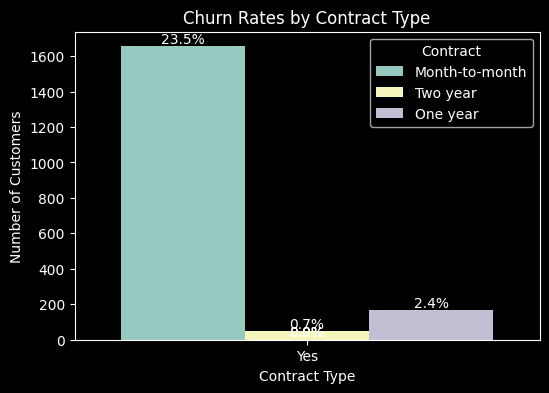

In [ ]:
# Contract type distribution against the churn status
fig = plt.figure(figsize=(6, 4))
sns.countplot(data=df[df['Churn'] == 'Yes'], x='Churn', hue='Contract')
plt.title('Churn Rates by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Number of Customers')

for p in plt.gca().patches:
    height = p.get_height()
    # plt.gca().text(p.get_x() + p.get_width() / 2, height + 1,
    #               f'{height}', ha='center', va='bottom', fontsize=10, color='black')


for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(p.get_x() + p.get_width() / 2, height + 1,
                   f'{height / len(df) * 100:.1f}%', ha='center', va='bottom')


The majority of customers who churned (23.5%) had month-to-month contracts, while the other contracts had lower churn rates (2.4% for one year and 0.7% for two years).  This suggests that customers with month-to-month contracts are more likely to switch to another company, possibly due to the flexibility of terminating a short-term contract. 

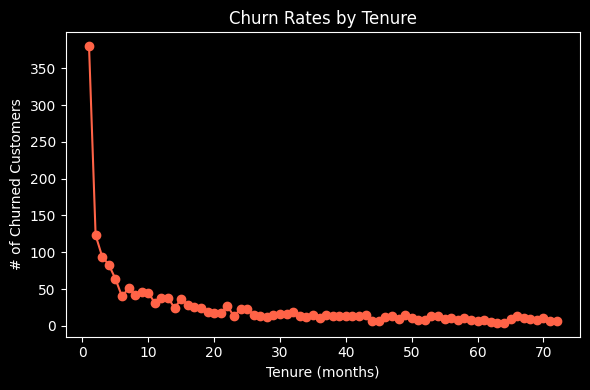

In [ ]:
# tenure distribution against the churn status
fig = plt.figure(figsize=(6, 4))
# Group by tenure and count churned customers
churned_by_tenure = df[df['Churn'] == 'Yes'].groupby('tenure').size()

# Show percentage interactively (TBD)

for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(p.get_x() + p.get_width() / 2, height + 1,
                   f'{height / len(df) * 100:.1f}%', ha='center', va='bottom')

plt.plot(churned_by_tenure.index, churned_by_tenure.values,
         marker='o', color='tomato')
plt.ylabel('# of Churned Customers')
plt.xlabel('Tenure (months)')
plt.title('Churn Rates by Tenure')
plt.tight_layout()
plt.show()


The highest churn rate is seen in the month-to-month contract type as previously shown.  In this chart, the first 1-2 months of the contract shows higher churning and is critical for customer retention.  

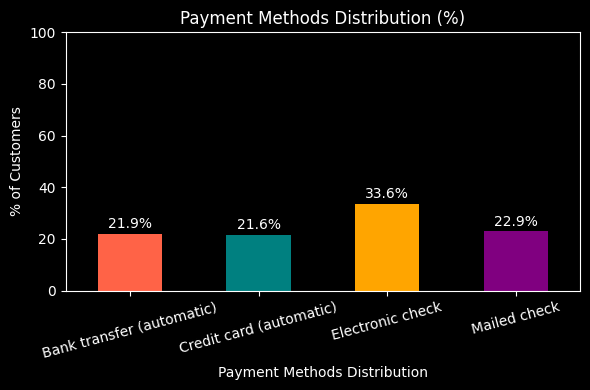

In [ ]:
# Payment methods distribution
payment_percent = df['PaymentMethod'].value_counts(
    normalize=True).sort_index() * 100

fig, ax = plt.subplots(figsize=(6, 4))
payment_percent.plot(kind='bar', ax=ax, color=[
                     'tomato', 'teal', 'orange', 'purple'])
ax.set_xticklabels(payment_percent.index, rotation=15)
plt.xlabel('Payment Methods Distribution')
plt.ylabel('% of Customers')
plt.ylim(0, 100)

# Show percentage on each bar
for i, percent in enumerate(payment_percent):
    ax.text(i, percent + 1, f"{percent:.1f}%", ha='center', va='bottom')
plt.title('Payment Methods Distribution (%)')
plt.tight_layout()
plt.show()


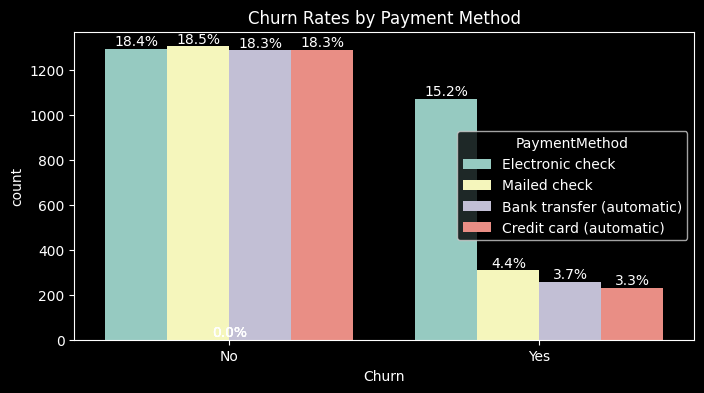

In [ ]:
# Payment methods distribution against the churn status
fig = plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Churn', hue='PaymentMethod')
plt.title('Churn Rates by Payment Method')

# Show percentage on top of each bar
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(p.get_x() + p.get_width() / 2, height + 1,
                   f'{height / len(df) * 100:.1f}%', ha='center', va='bottom')


The payment methods by the customers who stay with the company are equally distributed, while the customers who churned are more likely to use electronic check.  This suggests that customers who use electronic check are more likely to switch to another company.

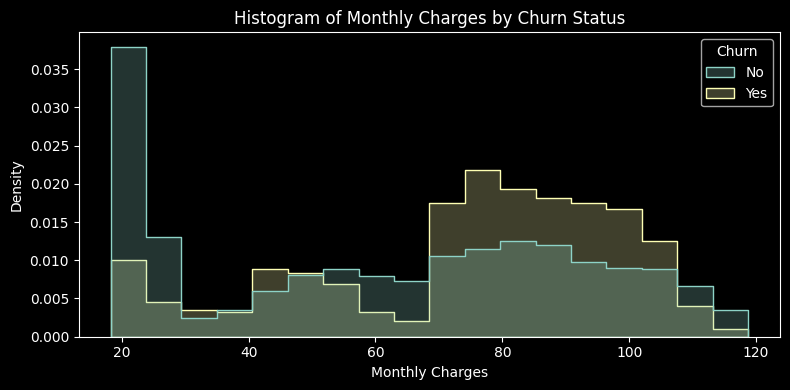

In [ ]:
# Monthly charges distribution against the churn status
fig = plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='MonthlyCharges', hue='Churn',
             element='step', stat='density', common_norm=False)
plt.title('Histogram of Monthly Charges by Churn Status')
plt.xlabel('Monthly Charges')
plt.ylabel('Density')
plt.tight_layout()
plt.show()


Customers with monthly charges between $70-110 have higher churning.  This suggests that customers who pay higher monthly charges are more likely to switch to another company.  It would be beneficial to investigate the breakdown of the monthly charges to understand which services are contributing to the higher charges and less attractive to customers.

#### Services

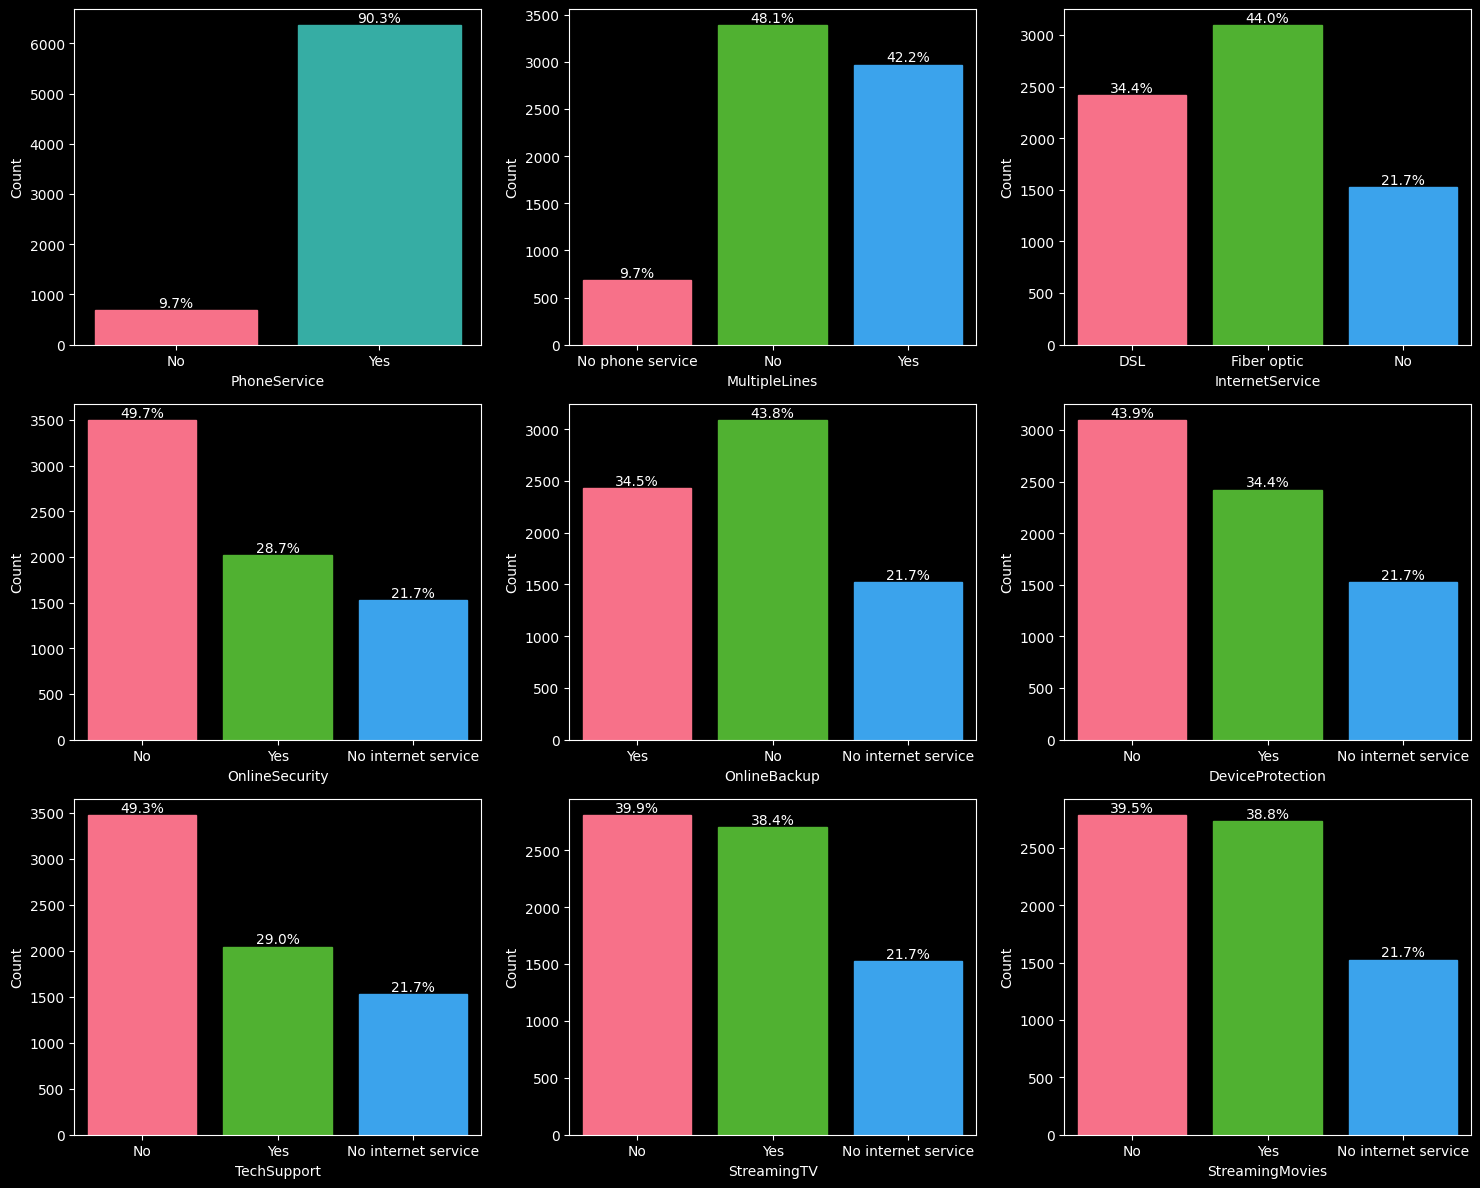

In [ ]:
# Service distributions
services = ['PhoneService', 'MultipleLines', 'InternetService',
            'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
            'TechSupport', 'StreamingTV', 'StreamingMovies']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
for i, item in enumerate(services):
    ax = axes[i // 3, i % 3]
    sns.countplot(data=df, x=item, ax=ax, color='teal')
    ax.set_xlabel(item)
    ax.set_ylabel('Count')
    # Show percentage on top of each bar
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2, height + 1,
                f'{height / len(df) * 100:.1f}%', ha='center', va='bottom')
        # Use different colors for each bar
        for bar, color in zip(ax.patches, sns.color_palette("husl", n_colors=len(ax.patches))):
            bar.set_color(color)
plt.tight_layout()
plt.show()


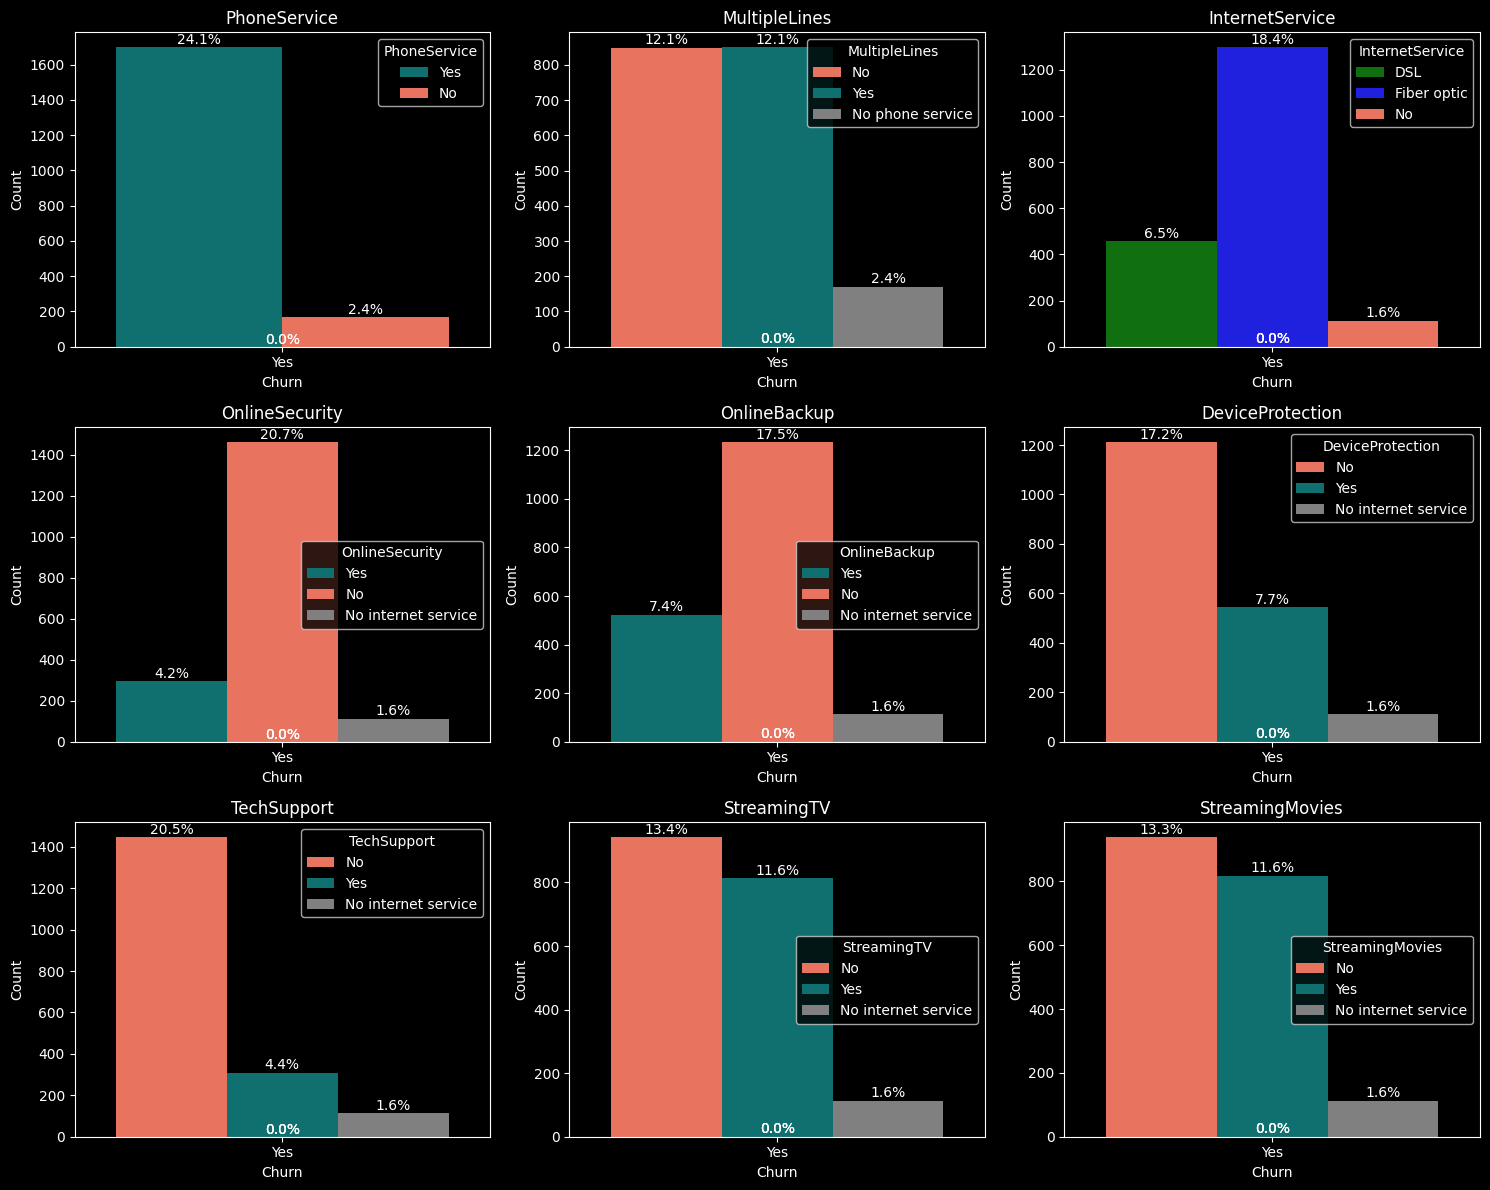

In [ ]:
# Services distribution against the churn status

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
for i, item in enumerate(services):
    ax = axes[i // 3, i % 3]
    # Define color palette for each service
    unique_vals = df[item].unique()
    palette = {}
    for val in unique_vals:
        if val == 'No':
            palette[val] = 'tomato'
        elif val == 'Yes':
            palette[val] = 'teal'
        elif val == 'Fiber optic':
            palette[val] = 'blue'
        elif val == 'No internet service':
            palette[val] = 'gray'
        elif val == 'No phone service':
            palette[val] = 'gray'
        else:
            palette[val] = 'green'
    sns.countplot(data=df[df['Churn'] == 'Yes'],
                  x='Churn', hue=item, ax=ax, palette=palette)
    ax.set_xlabel('Churn')
    ax.set_ylabel('Count')
    ax.set_title(item)
    # Show percentage on top of each bar
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2, height + 1,
                f'{height / len(df) * 100:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()


Among the services, higher churn rates are observed in customers who have Phone Service and Fiber Optic, but lack Online Security, Online Backup, Device Protection, and Tech Support. This suggests that churned customers may have been dissatisfied with the Fiber Optic service offering and no supportive services are more likely to migrate to another company.

## 3. Preprocessing and Feature Engineering
Handle missing values, convert categorical variables to numerical, and address class imbalance.

In [ ]:
df.columns.values


array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'Single'], dtype=object)

In [ ]:
# Finding missing values
df.isnull().sum()


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
Single              0
dtype: int64

In [ ]:
# Check for duplicates
# df.duplicated().sum()
df.loc[df.duplicated(),]


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Single


In [ ]:
df.describe()


,SeniorCitizen,tenure,MonthlyCharges,Single
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,0.465711
std,0.368612,24.559481,30.090047,0.498858
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,0.000000
50%,0.000000,29.000000,70.350000,0.000000
75%,0.000000,55.000000,89.850000,1.000000
max,1.000000,72.000000,118.750000,1.000000


In [ ]:
df.describe(include='object')


,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,20.2,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


In [ ]:
df[['TotalCharges', 'MonthlyCharges']].dtypes


TotalCharges       object
MonthlyCharges    float64
dtype: object

`TotalCharges`should be data type (float64), not object.  Convert `TotalCharges` to numeric.  Then, check for missing values.

In [ ]:
# Convert 'TotalCharges' to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.isnull().sum()


customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
Single               0
dtype: int64

11 `TotalCharges` has missing values.`

In [ ]:
df[np.isnan(df['TotalCharges'])]


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Single
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No,0
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No,0
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No,0
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No,0
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No,0
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No,0
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No,0
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No,0
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No,0
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No,0


In [ ]:
df[df['tenure'] == 0].index


Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

The `tenure` column is 0 months for 11 customers who don't have `TotalCharges`.  This could indicate that these customers are new and have not yet been billed yet.  These customers have not been with the services long enough to accumulate any charges.  We can drop these rows without significant impact on the data.  

In [ ]:
df.drop(labels=df[df['tenure'] == 0].index, axis=0, inplace=True)
df[df['tenure'] == 0].index


Index([], dtype='int64')

In [ ]:
# Remove `customerID`
df = df.drop(['customerID'], axis=1)
df.shape


(7032, 21)

#### Feature Engineering 


In [ ]:
# Group tenure values into groups and create a new column 'TenureGroup'
def tenure_group(tenure):
    if tenure <= 12:
        return '0-1 year'
    elif tenure <= 24:
        return '1-2 years'
    elif tenure <= 48:
        return '2-4 years'
    elif tenure <= 60:
        return '4-5 years'
    else:
        return '5+ years'


df['TenureGroup'] = df['tenure'].apply(tenure_group)


In [ ]:
# print TenureGroup unique values
print(df['TenureGroup'].unique())


['0-1 year' '2-4 years' '1-2 years' '5+ years' '4-5 years']


In [ ]:
# # Add a feature for single customers
# df['SingleCustomers'] = ((df['Partner'] == 'No') & (
#     df['Dependents'] == 'No')).astype(int)
# Added the feature already


In [ ]:
# Monthly vs. Total Charges Ratio - to see payment parttern and lifetime values
df['AvgMonthlyCharges'] = df['TotalCharges'] / (df['tenure'] + 1)


In [ ]:
# Number of services - to see how many services each customer has
df['NumServices'] = df[services].apply(lambda x: sum(x == 'Yes'), axis=1)


In [ ]:
# Payment method - to see if customer uses Electronic Check or not
df['IsElectronicCheck'] = (df['PaymentMethod'] ==
                           'Electronic check').astype(int)


#### Class Imbalance


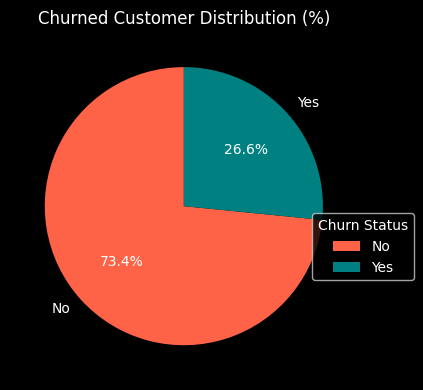

In [ ]:
# Churned customer distribution as pie chart
churn_percent = df['Churn'].value_counts(normalize=True).sort_index() * 100

fig, ax = plt.subplots(figsize=(4, 4))
wedges, texts, autotexts = ax.pie(
    churn_percent,
    labels=churn_percent.index,
    autopct='%1.1f%%',
    colors=['tomato', 'teal'],
    startangle=90
)
plt.title('Churned Customer Distribution (%)')
plt.tight_layout()
plt.legend(wedges, ['No', 'Yes'], title='Churn Status',
           loc='upper left', bbox_to_anchor=(0.85, 0.5))
plt.show()


26.6% of the customers are churned (switched to another service provider).  
The dataset is imbalanced, with 26.6% of the customers churned and 73.4% of the customers not churned.  This can lead to biased predictions towards the majority class.  To address this, we can use resampling techniques such as oversampling or undersampling the majority class.

In [ ]:
# Calculate churn statistics
churned_customers = df[df['Churn'] == 'Yes']
total_churned_count = len(churned_customers)
total_monthly_charges_churned = churned_customers['MonthlyCharges'].sum()

print(f"Number of customers who churned: {total_churned_count:,}")
print(
    f"Total monthly charges for churned customers: ${total_monthly_charges_churned:,.2f}")
print(
    f"Average monthly charge per churned customer: ${total_monthly_charges_churned/total_churned_count:,.2f}")
print(f"Annual revenue lost: ${total_monthly_charges_churned * 12:,.2f}")


Number of customers who churned: 1,869
Total monthly charges for churned customers: $139,130.85
Average monthly charge per churned customer: $74.44
Annual revenue lost: $1,669,570.20


#### Encoding, Scaling, and Resampling
Encode categorical variables to numerical values, scale numerical features, and resampling to balance the classes.

SMOTE (Synthetic Minority Over-sampling Technique) creates synthetic samples for the minority class (churned customers), which helps to balance the class distribution and improve the performance of classification models.

In [ ]:
# Encode target variable 'Churn'
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

X = df.drop(['Churn'], axis=1)  # freatures
y = df['Churn']                 # target variable

# Encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Apply SMOTE to training data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Check the class distribution before and after SMOTE
print("Class distribution before SMOTE:", y_train.value_counts())
print("Class distribution after SMOTE:", y_train_res.value_counts())


NameError: name 'SMOTE' is not defined

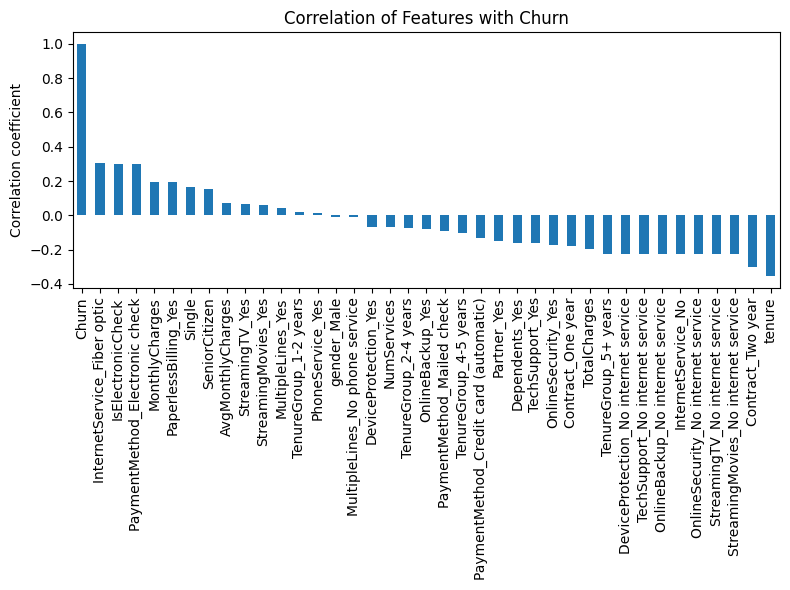

In [ ]:
# Correlation between Churn and other features
plt.figure(figsize=(8, 6))
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.corr()['Churn'].sort_values(ascending=False).plot(kind='bar')
plt.title('Correlation of Features with Churn')
plt.ylabel('Correlation coefficient')
plt.tight_layout()
plt.show()


Customers who have Fiber Optic, who pay with electronic check, monthly charges, and paperless billing, single customers, and Senior customers seem to be positively correlated with churn.  On the other hand, tenure, a two-year contract, no streaming services (Movie and TV), and no internet service are negatively correlated with churn.  

We would look into positive correlations that are directly impacting churning.  Interestingly, those who don't have services are negatively correlated with churning, meaning that customers who don't have services tend to stay longer.


## 4. Building Churn Prediction Models

### 1) Logistic Regression - Baseline Model

In [ ]:
# Train Logistic Regression model
lr_model = LogisticRegression(max_iter=1000)
result = lr_model.fit(X_train_res, y_train_res)


In [ ]:
# Predict probabilities
y_pred = lr_model.predict(X_test)
y_proba = lr_model.predict_proba(X_test)[:, 1]


In [ ]:
# Find the threshold that optimizes the f1 score

def find_best_threshold(y_true, y_proba, metric='f1'):
    thresholds = np.arange(0.0, 1.01, 0.01)
    scores = []

    for threshold in thresholds:
        y_pred = (y_proba >= threshold).astype(int)
        if metric == 'f1':
            score = f1_score(y_true, y_pred)
        elif metric == 'precision':
            score = precision_score(y_true, y_pred)
        elif metric == 'recall':
            score = recall_score(y_true, y_pred)
        else:
            raise ValueError("unsupported metric")
        scores.append([threshold, score])

    score_table = pd.DataFrame(scores, columns=['Threshold', metric])
    best_index = score_table.loc[score_table[metric].idxmax()]
    return best_index, score_table


# Find the best threshold
best_threshold, score_table = find_best_threshold(y_test, y_proba, metric='f1')
print(
    f'Best threshold: {best_threshold["Threshold"]:.2f} (F1: {best_threshold["f1"]:.4f})')

y_pred_best = (y_proba >= best_threshold['Threshold']).astype(float)

# Evaluate the model with the best threshold
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))

# save lr_model
joblib.dump(lr_model, 'lr_model.joblib')


Best threshold: 0.57 (F1: 0.6292)

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.78      0.83      1033
           1       0.55      0.73      0.63       374

    accuracy                           0.77      1407
   macro avg       0.72      0.76      0.73      1407
weighted avg       0.80      0.77      0.78      1407

ROC-AUC: 0.835320777963566


['lr_model.joblib']

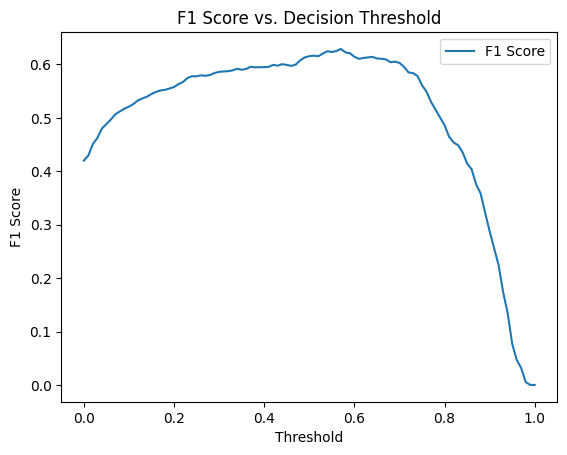

In [ ]:
# Plot F1 score vs. decision threshold
plt.plot(score_table['Threshold'], score_table['f1'], label='F1 Score')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.title('F1 Score vs. Decision Threshold')
plt.legend()
plt.show()


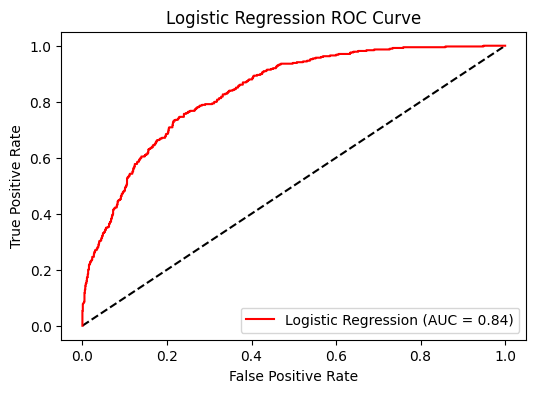

In [ ]:
# ROC-AUC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(6, 4))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression (AUC = {:.2f})'.format(
    roc_auc_score(y_test, y_proba)), color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.legend()
plt.show()


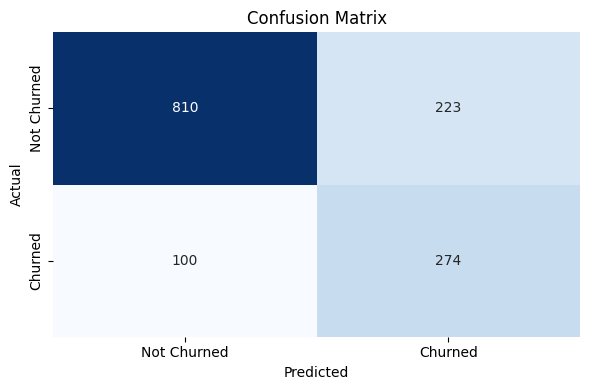

In [ ]:
# Confusion Matrix
plt.figure(figsize=(6, 4))
cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Churned', 'Churned'],
            yticklabels=['Not Churned', 'Churned'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()


The Logistic Regression model predicted about 73.5% of the actual churned customers (recall) and 55.2% of the predicted churned customers are actually churned (precision).  The F1 score is 0.735, which is a good balance between precision and recall.  The ROC-AUC score is 0.83 and overall accuracy is 0.77, which indicates that the model has a good ability to distinguish between churned and non-churned customers.

- The model is better finding the churned customers (recall) than being certain they will churn (precision).
- The relatively high False Positive count (223) indicates that the model is predicting many customers as churned when they are not, which could lead to unnecessary retention efforts and costs, but it it safer than missing churning customers.


### 2) Tree Based Models
Random Forest and XGBoost models to be trained to predict customer churn.

In [ ]:
# Train models
models = {
    "Logistic Regression": lr_model,
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "XGBoost": XGBClassifier(eval_metric='logloss', use_label_encoder=False, random_state=42)
}

model_results = {}
model_probs = {}

for name, model in models.items():
    model.fit(X_train_res, y_train_res)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_proba)
    model_results[name] = auc
    model_probs[name] = y_proba

# Find the best threshold


def find_best_threshold(y_true, y_proba):
    precision, recall, thresholds = precision_recall_curve(y_true, y_proba)
    f1_scores = 2 * (precision * recall) / (precision + recall + 1e-8)
    best_index = np.argmax(f1_scores)
    return thresholds[best_index], f1_scores[best_index]


thresholds_dict = {}
for name, probs in model_probs.items():
    best_threshold, best_f1 = find_best_threshold(y_test, probs)
    thresholds_dict[name] = (best_threshold, best_f1)


c:\Users\n_oha\ohashin2G\Telcom-Churn-Prediction\Telcom-Churn-Prediction\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:03:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


## 5. Cross-Validation
#### Approach:
Using `GridSearchCV` with `StratifiedKFold` cross-validation for hyperparameter tuning, and single test set evaluation.

In [ ]:
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


In [ ]:
# Logistic Regression tuning
lr_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(solver='liblinear', max_iter=500))
])

lr_params = {
    'clf__C': [0.01, 0.1, 1, 10],
    'clf__penalty': ['l1', 'l2']
}

lr_grid = GridSearchCV(
    estimator=lr_pipeline,
    param_grid=lr_params,
    cv=cv_strategy,
    scoring='accuracy',
    n_jobs=-1
)

lr_grid.fit(X, y)
print("Best Logistic Regression params:", lr_grid.best_params_)
print("Best Logistic Regression score:", lr_grid.best_score_)


Best Logistic Regression params: {'clf__C': 0.1, 'clf__penalty': 'l2'}
Best Logistic Regression score: 0.8075935097930385


In [ ]:
# Random Forest tuning
rf_model = RandomForestClassifier(random_state=42)

rf_params = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_grid = GridSearchCV(
    estimator=rf_model,
    param_grid=rf_params,
    cv=cv_strategy,
    scoring='accuracy',
    n_jobs=-1
)

rf_grid.fit(X, y)
print("Best Random Forest params:", rf_grid.best_params_)
print("Best Random Forest score:", rf_grid.best_score_)


Best Random Forest params: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 500}
Best Random Forest score: 0.8054606059319335


In [ ]:
# XGBoost tuning
xgb_model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

xgb_params = {
    'n_estimators': [100, 200, 500],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

xgb_grid = GridSearchCV(
    estimator=xgb_model,
    param_grid=xgb_params,
    cv=cv_strategy,
    scoring='accuracy',
    n_jobs=-1
)

xgb_grid.fit(X, y)
print("Best XGBoost params:", xgb_grid.best_params_)
print("Best XGBoost score:", xgb_grid.best_score_)


c:\Users\n_oha\ohashin2G\Telcom-Churn-Prediction\Telcom-Churn-Prediction\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:07:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best XGBoost params: {'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500, 'subsample': 0.8}
Best XGBoost score: 0.8060287871756844


## 6. Model Evaluation and Comparison

In [ ]:
# Compare models and Find the best model
# Use best models from `GridSearchCV` for comparison
models = {
    "Logistic Regression": lr_grid.best_estimator_,
    "Random Forest": rf_grid.best_estimator_,
    "XGBoost": xgb_grid.best_estimator_
}

print("\nModel Performance:")

for name in models:
    auc = model_results[name]
    best_threshold, best_f1 = thresholds_dict[name]
    y_pred_best = (model_probs[name] >= best_threshold).astype(int)
    precision = precision_score(y_test, y_pred_best)
    recall = recall_score(y_test, y_pred_best)

    print(f"{name}: ROC-AUC = {auc:.3f}, Best Threshold = {best_threshold:.2f}, F1 = {best_f1:.4f}, Precision = {precision:.4f}, Recall = {recall:.4f}")
    print(classification_report(y_test, y_pred_best))
    print("ROC-AUC:", roc_auc_score(y_test, model_probs[name]))
    print('-' * 50)



Model Performance:
Logistic Regression: ROC-AUC = 0.835, Best Threshold = 0.57, F1 = 0.6292, Precision = 0.5513, Recall = 0.7326
              precision    recall  f1-score   support

           0       0.89      0.78      0.83      1033
           1       0.55      0.73      0.63       374

    accuracy                           0.77      1407
   macro avg       0.72      0.76      0.73      1407
weighted avg       0.80      0.77      0.78      1407

ROC-AUC: 0.835320777963566
--------------------------------------------------
Random Forest: ROC-AUC = 0.818, Best Threshold = 0.38, F1 = 0.6217, Precision = 0.5302, Recall = 0.7513
              precision    recall  f1-score   support

           0       0.89      0.76      0.82      1033
           1       0.53      0.75      0.62       374

    accuracy                           0.76      1407
   macro avg       0.71      0.76      0.72      1407
weighted avg       0.80      0.76      0.77      1407

ROC-AUC: 0.8184445387765243
------

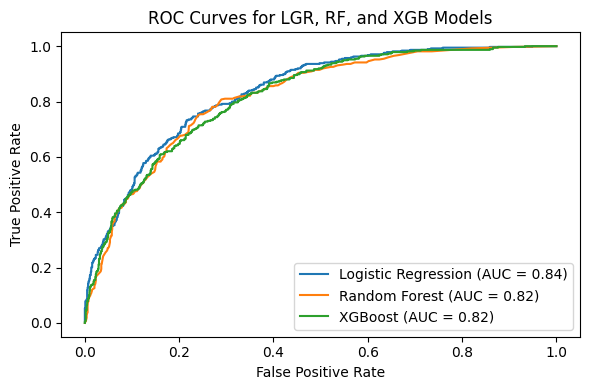

In [ ]:
# ROC-AUC curve for each model
plt.figure(figsize=(6, 4))
for name, probs in model_probs.items():
    fpr, tpr, _ = roc_curve(y_test, probs)
    plt.plot(
        fpr, tpr, label=f'{name} (AUC = {roc_auc_score(y_test, model_probs[name]):.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for LGR, RF, and XGB Models')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
# Cross-validation results

cv_results = []

for name in models:
    auc = model_results[name]
    best_threshold, best_f1 = thresholds_dict[name]
    y_pred_best = (model_probs[name] >= best_threshold).astype(int)
    precision = precision_score(y_test, y_pred_best)
    recall = recall_score(y_test, y_pred_best)
    train_accuracy = np.mean(cross_val_score(
        models[name], X, y, cv=cv_strategy, scoring='accuracy'))
    test_accuracy = accuracy_score(y_test, y_pred_best)

    cv_results.append([
        name,
        f"{auc:.5f}",
        f"{best_threshold:.5f}",
        f"{best_f1:.5f}",
        f"{precision:.5f}",
        f"{recall:.5f}",
        f"{train_accuracy:.5f}",
        f"{test_accuracy:.5f}"
    ])

# Create concise DataFrame with columns
cv_results = pd.DataFrame(cv_results, columns=[
    'Model', 'ROC AUC', 'Best Threshold', 'F1 Score',
    'Precision', 'Recall', 'Train Accuracy', 'Test Accuracy'
])

# Save to CSV
cv_results.to_csv('cv_results.csv', index=False)

cv_results = pd.DataFrame(cv_results)
cv_results


c:\Users\n_oha\ohashin2G\Telcom-Churn-Prediction\Telcom-Churn-Prediction\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:08:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\n_oha\ohashin2G\Telcom-Churn-Prediction\Telcom-Churn-Prediction\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:08:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\n_oha\ohashin2G\Telcom-Churn-Prediction\Telcom-Churn-Prediction\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:08:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\n_oha\ohashin2G\Telcom-Churn-Prediction\Telcom-Churn-Predicti

,Model,ROC AUC,Best Threshold,F1 Score,Precision,Recall,Train Accuracy,Test Accuracy
0,Logistic Regression,0.83532,0.57183,0.62916,0.55131,0.73262,0.80759,0.77043
1,Random Forest,0.81844,0.38000,0.62168,0.53019,0.75134,0.80546,0.75693
2,XGBoost,0.81938,0.32972,0.60000,0.51744,0.71390,0.80461,0.74698


#### Bootstrap Resampling
If time permits, I can perform bootstrap resampling to obtain additional confidence intervals and assess the stability of the results.

## 7. Findings and Analysis

#### Feature Importance

Best Model: Logistic Regression


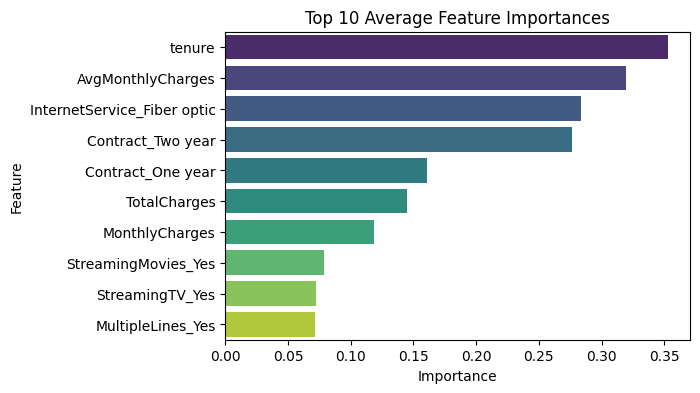

In [ ]:
# Feature importance

def get_feature_importance(model, feature_names):
    if hasattr(model, "coef_"):
        return pd.DataFrame({"Feature": feature_names, "Importance": np.abs(model.coef_[0])})
    elif hasattr(model, "feature_importances_"):
        return pd.DataFrame({"Feature": feature_names, "Importance": model.feature_importances_})
    else:
        return None


# Update models dictionary to use the best estimators
models = {
    # Extract just the classifier
    "Logistic Regression": lr_grid.best_estimator_.named_steps['clf'],
    "Random Forest": rf_grid.best_estimator_,
    "XGBoost": xgb_grid.best_estimator_
}


feat_importances = []
feature_names = X.columns if hasattr(X, 'columns') else [
    f'feature_{i}' for i in range(X_train.shape[1])]
for name, model in models.items():
    importance = get_feature_importance(model, feature_names)
    if importance is not None:
        importance['Model'] = name
        feat_importances.append(importance)

feat_df = pd.concat(feat_importances).sort_values(
    by="Importance", ascending=False)

plt.figure(figsize=(6, 4))
sns.barplot(
    data=feat_df.groupby("Feature")['Importance'].mean().reset_index(
    ).sort_values("Importance", ascending=False).head(10),
    x='Importance', y='Feature', hue='Feature', palette='viridis', legend=False
)
# print the best model
best_model_name = feat_df['Model'].iloc[0]
print(f"Best Model: {best_model_name}")

plt.title("Top 10 Average Feature Importances")
plt.show()


In [ ]:
# Number of Contract_Two year
print("Number of Contract_Two year:")
print(X['Contract_Two year'].value_counts())
print(X['Contract_Two year'].value_counts(normalize=True) * 100)


Number of Contract_Two year:
Contract_Two year
False    5347
True     1685
Name: count, dtype: int64
Contract_Two year
False    76.038111
True     23.961889
Name: proportion, dtype: float64


1. Tenure is the most important churn driver.  Customers with shorter tenure (newer customers) are more likely to leave.  This suggests that the first few months are critical, and a need for early retention efforts to engage and retain new customers.
2. AveMonthlyCharges is the second most important churn driver.  Customers with higher average monthly charges are more likely to churn.  This might indicate that customers may feel they are overpaying for the services they receive, leading to dissatisfaction and leaving the company.
3. Fiber Optic is the third driver.  Customers with fiber optic internet may churn more, possibly due to dissatisfaction with the service or pricing.  This suggests that the company should focus on improving the fiber optic service quality and customer satisfaction.


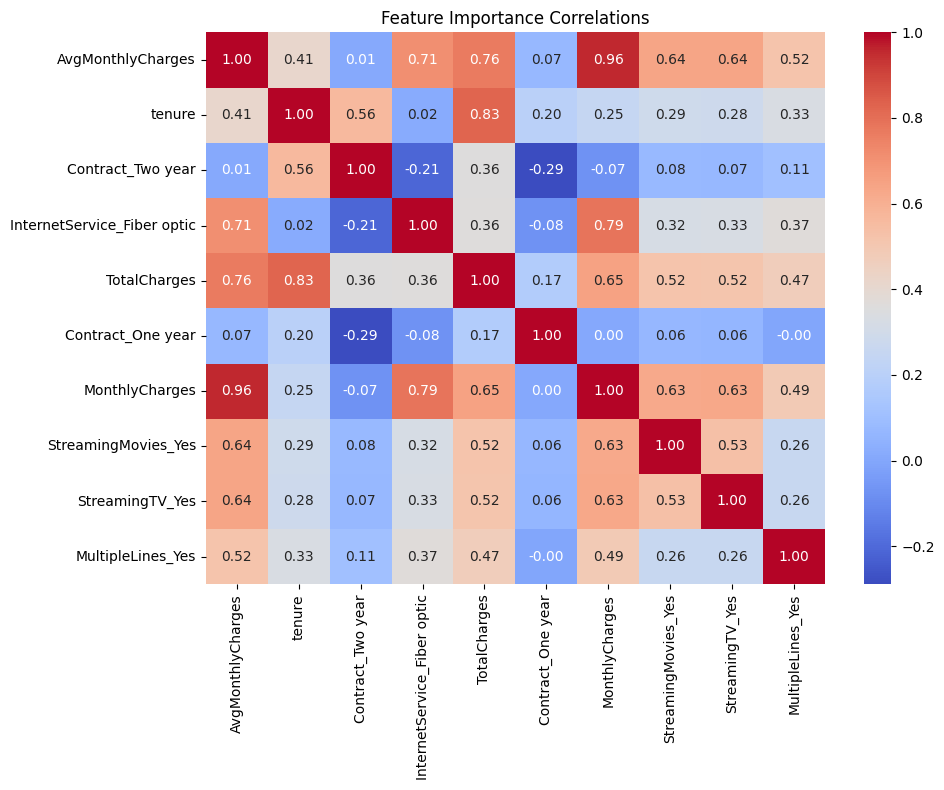

In [ ]:
# Correlations among importance features
importance_features = feat_df['Feature'].head(10).unique().tolist()
importance_corr = X[importance_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(importance_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Importance Correlations')
plt.tight_layout()
plt.show()


C:\Users\n_oha\AppData\Local\Temp\ipykernel_46356\258586683.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segment_details = df.groupby(['TenureGroup', 'ChargesBin']).agg({
C:\Users\n_oha\AppData\Local\Temp\ipykernel_46356\258586683.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_by_tenure_charges = df.groupby(['TenureGroup', 'ChargesBin'])[


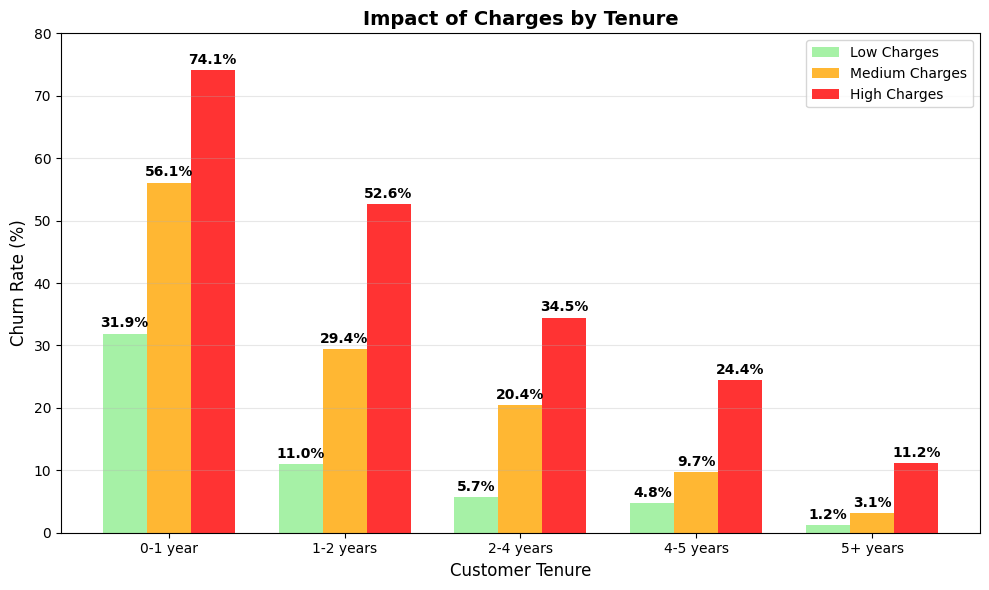


Churn Rates by Tenure Group and Charges Level:
ChargesBin   Low Charges  Medium Charges  High Charges
TenureGroup                                           
0-1 year            31.9            56.1          74.1
1-2 years           11.0            29.4          52.6
2-4 years            5.7            20.4          34.5
4-5 years            4.8             9.7          24.4
5+ years             1.2             3.1          11.2


In [ ]:
# Create charge bins for intersectional analysis
df['ChargesBin'] = pd.cut(df['MonthlyCharges'],
                          bins=3,
                          labels=['Low Charges', 'Medium Charges', 'High Charges'])

# Calculate detailed segment information
segment_details = df.groupby(['TenureGroup', 'ChargesBin']).agg({
    'Churn': ['count', 'sum', 'mean']
}).round(3)

# Calculate churn rates by tenure group and charges bin
churn_by_tenure_charges = df.groupby(['TenureGroup', 'ChargesBin'])[
    'Churn'].mean() * 100

# Pivot for plotting
pivot_data = churn_by_tenure_charges.unstack()

# Create the bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Define colors
colors = ['lightgreen', 'orange', 'red']

# Create grouped bar chart
x = range(len(pivot_data.index))
width = 0.25

for i, (charge_level, color) in enumerate(zip(pivot_data.columns, colors)):
    values = pivot_data[charge_level].values
    bars = ax.bar([pos + i * width for pos in x], values,
                  width, label=charge_level, color=color, alpha=0.8)

    # Add percentage labels on bars
    for bar, value in zip(bars, values):
        if not pd.isna(value):
            ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
                    f'{value:.1f}%', ha='center', va='bottom', fontweight='bold')

# Add titles
ax.set_xlabel('Customer Tenure', fontsize=12)
ax.set_ylabel('Churn Rate (%)', fontsize=12)
ax.set_title('Impact of Charges by Tenure',
             fontsize=14, fontweight='bold')
ax.set_xticks([pos + width for pos in x])
ax.set_xticklabels(pivot_data.index)
ax.legend()
ax.grid(axis='y', alpha=0.3)

# Set y-axis limit to match the original chart
ax.set_ylim(0, 80)

plt.tight_layout()
plt.show()


print("\nChurn Rates by Tenure Group and Charges Level:")
print(pivot_data.round(1))


In [ ]:
# Print monthly charges ranges for low, medium, and high charges
low_charge_range = df[df['ChargesBin'] ==
                      'Low Charges']['MonthlyCharges'].describe()
medium_charge_range = df[df['ChargesBin'] ==
                         'Medium Charges']['MonthlyCharges'].describe()
high_charge_range = df[df['ChargesBin'] ==
                       'High Charges']['MonthlyCharges'].describe()

print(f"Low Charges Range:\n{low_charge_range}\n")
print(f"Medium Charges Range:\n{medium_charge_range}\n")
print(f"High Charges Range:\n{high_charge_range}\n")


Low Charges Range:
count    2445.000000
mean       28.942147
std        11.419882
min        18.250000
25%        20.000000
50%        24.100000
75%        40.050000
max        51.750000
Name: MonthlyCharges, dtype: float64

Medium Charges Range:
count    2434.000000
mean       71.032580
std         9.504993
min        51.800000
25%        63.912500
50%        72.700000
75%        79.400000
max        85.250000
Name: MonthlyCharges, dtype: float64

High Charges Range:
count    2153.000000
mean       98.469183
std         8.256895
min        85.300000
25%        90.950000
50%        98.150000
75%       104.850000
max       118.750000
Name: MonthlyCharges, dtype: float64



C:\Users\n_oha\AppData\Local\Temp\ipykernel_46356\4081654155.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  customer_counts = df.groupby(['TenureGroup', 'ChargesBin']).size().unstack()


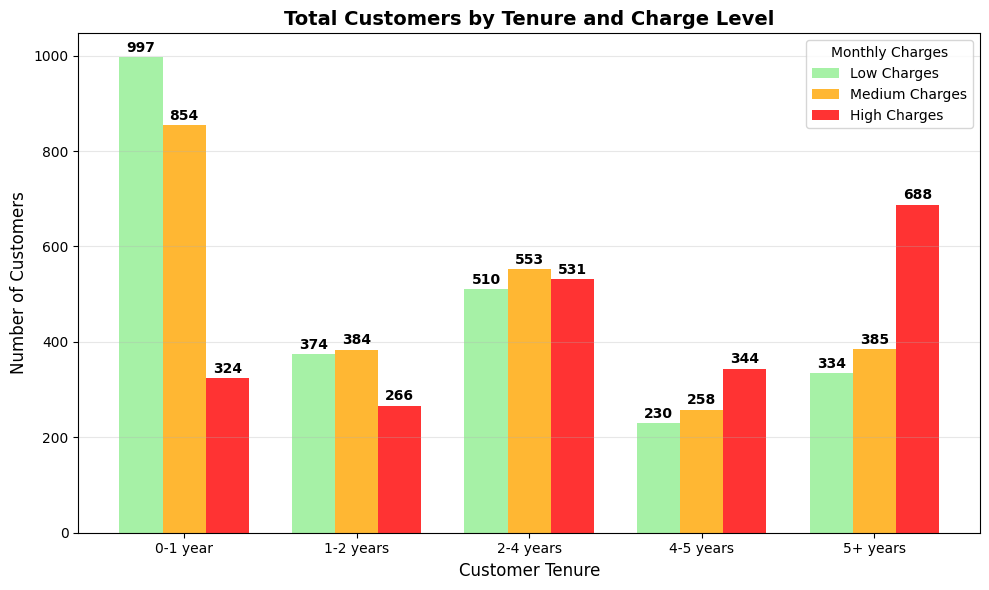


Sample size - Total: 7032 customers):
ChargesBin   Low Charges  Medium Charges  High Charges
TenureGroup                                           
0-1 year             997             854           324
1-2 years            374             384           266
2-4 years            510             553           531
4-5 years            230             258           344
5+ years             334             385           688


In [ ]:
# Calculate customer counts for the second plot
customer_counts = df.groupby(['TenureGroup', 'ChargesBin']).size().unstack()

# Create second plot separately for customer counts (denominators)
fig2, ax2 = plt.subplots(figsize=(10, 6))

# Define colors
colors = ['lightgreen', 'orange', 'red']

# Create grouped bar chart for customer counts
x = range(len(customer_counts.index))
width = 0.25

for i, (charge_level, color) in enumerate(zip(customer_counts.columns, colors)):
    values = customer_counts[charge_level].values
    bars = ax2.bar([pos + i * width for pos in x], values,
                   width, label=charge_level, color=color, alpha=0.8)

    # Add count labels on bars
    for bar, value in zip(bars, values):
        if not pd.isna(value) and value > 0:
            ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5,
                     f'{int(value)}', ha='center', va='bottom', fontweight='bold')

ax2.set_xlabel('Customer Tenure', fontsize=12)
ax2.set_ylabel('Number of Customers', fontsize=12)
ax2.set_title('Total Customers by Tenure and Charge Level',
              fontsize=14, fontweight='bold')
ax2.set_xticks([pos + width for pos in x])
ax2.set_xticklabels(customer_counts.index)
ax2.legend(title='Monthly Charges')
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print(
    f"\nSample size - Total: {customer_counts.sum().sum()} customers):")
print(customer_counts.fillna(0).astype(int))


#### Risk Segmentation


In [ ]:
# Top Churn Risk Segments
best_model_name = max(model_results, key=model_results.get)
best_model = models[best_model_name]  # LogisticRegression
best_threshold = thresholds_dict[best_model_name][0]

# Predict churn probabilities on full dataset
all_probs = best_model.predict_proba(X)[:, 1]
X_with_probs = X.copy()
X_with_probs['Churn_Prob'] = all_probs
X_with_probs['High_Risk'] = (
    X_with_probs["Churn_Prob"] >= best_threshold).astype(int)


segment_features = ["tenure", "AvgMonthlyCharges",
                    "InternetService_Fiber optic", "Contract_Two year", "TotalCharges"]
risk_segments = (X_with_probs[X_with_probs["High_Risk"] == 1]
                 .groupby(segment_features)
                 .size()
                 .reset_index(name='Count')
                 .sort_values(by='Count', ascending=False))

print("\nTop Churn Risk Segments:")
print(risk_segments.head(10))



Top Churn Risk Segments:
     tenure  AvgMonthlyCharges  InternetService_Fiber optic  \
72        1             22.650                        False   
50        1             22.000                        False   
211       1             37.350                         True   
216       1             37.650                         True   
160       1             34.800                         True   
161       1             34.825                         True   
166       1             34.950                         True   
167       1             34.975                         True   
181       1             35.300                         True   
102       1             24.950                        False   

     Contract_Two year  TotalCharges  Count  
72               False         45.30      6  
50               False         44.00      4  
211              False         74.70      4  
216              False         75.30      4  
160              False         69.60      4  
161 

c:\Users\n_oha\ohashin2G\Telcom-Churn-Prediction\Telcom-Churn-Prediction\venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


- Low tenure: Top 10 customers at risk are in the first month of services, which means new customers are at highest risk of churning.  This matches with the feature importance findings.
- All top 10 customers do not have two-year contracts (False): Customers with shorter contracts more flexible to switch providers, indicating a higher risk of churning.
- High monthly charges: Customers with high monthly charges pay $44-$75.  Customers who pay higher monthly charges $70-75 also have fiber optic internet service.  This suggests that the customers with higher monthly charges are not satisfied with the fiber optic service and are more likely to churn.

<Axes: xlabel='TenureGroup', ylabel='Contract'>

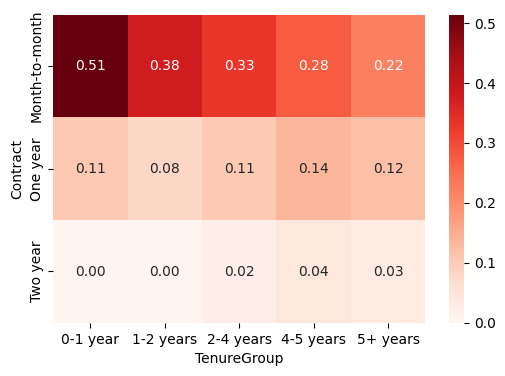

In [ ]:
# Visualize segment risk - Contract and Tenure
plt.figure(figsize=(6, 4))
segment_tenure = df.groupby(['Contract', 'TenureGroup'])[
    'Churn'].mean().reset_index()
pivot_table = segment_tenure.pivot(
    index='Contract', columns='TenureGroup', values='Churn')

sns.heatmap(pivot_table, annot=True, cmap='Reds', fmt=".2f")


<Axes: xlabel='InternetService', ylabel='Contract'>

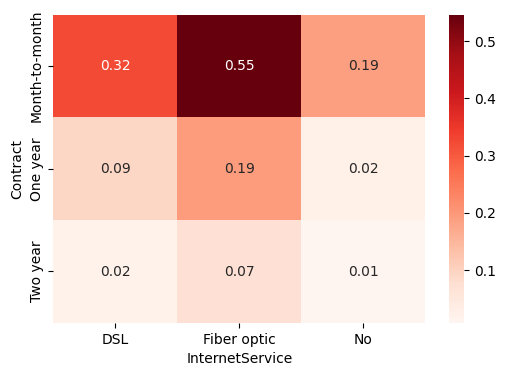

In [ ]:
# Visualize segment risk - Contract and Service Types
plt.figure(figsize=(6, 4))
segment_contract = df.groupby(['Contract', 'InternetService'])[
    'Churn'].mean().reset_index()
pivot_table = segment_contract.pivot(
    index='Contract', columns='InternetService', values='Churn')

sns.heatmap(pivot_table, annot=True, cmap='Reds', fmt=".2f")


Visualize segment risk by contract type and internet service.  The heatmap shows the average churn rate for each combination of contract type and internet service.  The highest risk segment is customers with month-to-month contracts and fiber optic internet service, followed by those with month-to-month contracts and DSL internet service.  This suggests that the company should focus on retaining these high-risk segments by improving service quality and customer satisfaction.

#### Segments by Financial Impact
Segments are ranked by top financial impact to identify the most valuable at-risk customers for ROI-driven retention strategy.

In [ ]:
df_segments = risk_segments.copy()
# Group by key features and calculate segment metrics
df_segments = df_segments.groupby(['tenure', 'Contract_Two year', 'InternetService_Fiber optic']).agg({
    'AvgMonthlyCharges': 'mean',
    'Count': 'sum'  # Sum the existing Count column
}).reset_index()

# Make sure AvgMonthlyCharges is numeric
df_segments['AvgMonthlyCharges'] = pd.to_numeric(
    df_segments['AvgMonthlyCharges'], errors='coerce')

# Sort segments by potential REVENUE saved
df_segments["RevenueSaved"] = df_segments["AvgMonthlyCharges"] * \
    df_segments["Count"]
top_segments = df_segments.sort_values(
    by="RevenueSaved", ascending=False).head(5)

# Update segment_features to match the available columns in df_segments
available_features = ['tenure', 'AvgMonthlyCharges',
                      'InternetService_Fiber optic', 'Contract_Two year']

# Display top segments with their defining features
for i, row in top_segments.iterrows():
    segment_desc = {feature: row[feature] for feature in available_features}
    print(f"Segment {i+1}:")
    print(f"  Features: {segment_desc}")
    print(f"  Count: {row['Count']}")
    print(
        f"  Average Monthly Charges per Customer: ${row['AvgMonthlyCharges']:.2f}")
    print(f"  Potential Monthly Revenue Saved: ${row['RevenueSaved']:.2f}")
    print(f"  Potential Annual Revenue Saved: ${row['RevenueSaved'] * 12:.2f}")
    print("-" * 50)


Segment 256:
  Features: {'tenure': 72, 'AvgMonthlyCharges': 106.13265942371281, 'InternetService_Fiber optic': True, 'Contract_Two year': True}
  Count: 145
  Average Monthly Charges per Customer: $106.13
  Potential Monthly Revenue Saved: $15389.24
  Potential Annual Revenue Saved: $184670.83
--------------------------------------------------
Segment 255:
  Features: {'tenure': 72, 'AvgMonthlyCharges': 58.30117268576173, 'InternetService_Fiber optic': False, 'Contract_Two year': True}
  Count: 198
  Average Monthly Charges per Customer: $58.30
  Potential Monthly Revenue Saved: $11543.63
  Potential Annual Revenue Saved: $138523.59
--------------------------------------------------
Segment 2:
  Features: {'tenure': 1, 'AvgMonthlyCharges': 39.697049689440995, 'InternetService_Fiber optic': True, 'Contract_Two year': False}
  Count: 235
  Average Monthly Charges per Customer: $39.70
  Potential Monthly Revenue Saved: $9328.81
  Potential Annual Revenue Saved: $111945.68
---------------

#### Reduction Scenario Analysis

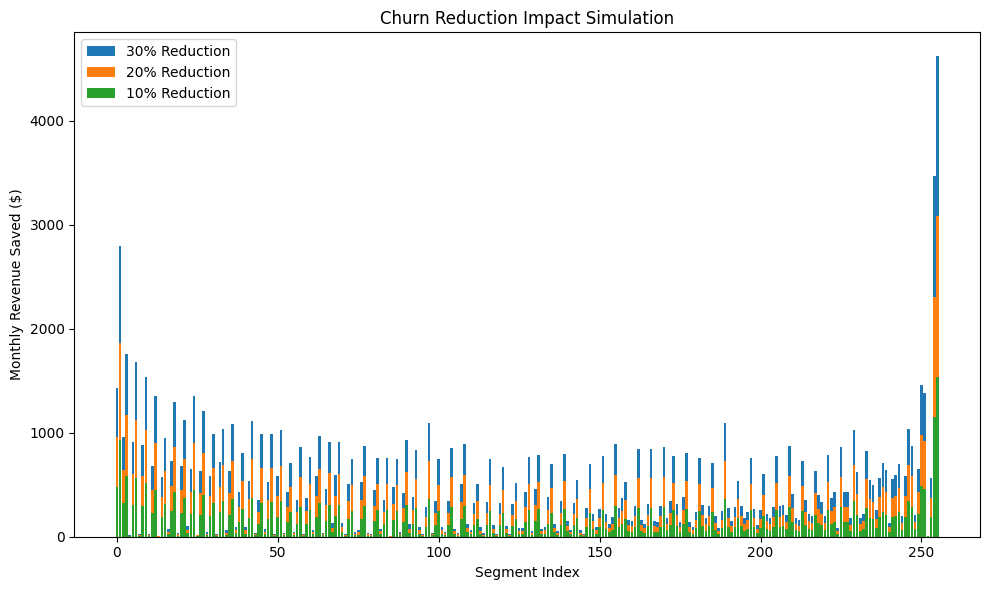

  ReductionRate  CustomersSaved  RevenueSaved  AnnualRevenueSaved
0           10%           687.0      41424.46           497093.52
1           20%          1374.0      82848.92           994187.04
2           30%          2061.0     124273.39          1491280.68


In [ ]:
# Simulate impact of churn reduction on revenue

# Calculate monthly revenue for each segment
df_segments['MonthlyRevenue'] = df_segments['AvgMonthlyCharges'] * \
    df_segments['Count']

# Define scenarios in %
scenarios = [0.10, 0.20, 0.30]  # 10%, 20%, 30% reduction

# Create simulation results
simulation_results = []

for rate in scenarios:
    temp = df_segments.copy()
    temp['ReductionRate'] = f"{int(rate*100)}%"
    temp['CustomersSaved'] = temp['Count'] * rate
    temp['RevenueSaved'] = temp['MonthlyRevenue'] * rate
    simulation_results.append(temp)

# Combine results into one DataFrame
impact_simulation = pd.concat(simulation_results)

# Sort by highest revenue saved for clarity
impact_simulation = impact_simulation.sort_values(
    by='RevenueSaved', ascending=False)

# Plot Revenue Saved by Scenario
plt.figure(figsize=(10, 6))
for rate in impact_simulation['ReductionRate'].unique():
    subset = impact_simulation[impact_simulation['ReductionRate'] == rate]
    plt.bar(subset.index, subset['RevenueSaved'], label=f"{rate} Reduction")

plt.ylabel("Monthly Revenue Saved ($)")
plt.xlabel("Segment Index")
plt.title("Churn Reduction Impact Simulation")
plt.legend()
plt.tight_layout()
plt.show()

# Print total revenue saved by segment
summary_table = impact_simulation.groupby('ReductionRate').agg({
    'CustomersSaved': 'sum',
    'RevenueSaved': 'sum'
}).reset_index()


summary_table['CustomersSaved'] = summary_table['CustomersSaved'].round(2)
summary_table['RevenueSaved'] = summary_table['RevenueSaved'].round(2)
summary_table['AnnualRevenueSaved'] = (
    summary_table['RevenueSaved'] * 12).round(2)


print(summary_table)


## 8. Recommendations

#### Key Findings
1. The top features influencing churn include tenure, monthly charges, and contract type.
2. High-risk segments are characterized by shorter tenure and higher monthly charges.
3. Customers with high monthly payments with fiber optic internet service are also at risk.
4. Long-term customers are high-value customers who contribute significantly to revenue.
5. Retaining these customers is crucial for improving customer retention and reducing churn.


#### Business Recommendations

1. Target High-Risk Segments: Focus on the top 5 risk segments identified in the analysis. These customers have the highest potential for churn and should be prioritized for retention efforts.
	1) Retain long-term, high-value customers with fiber optic internet service by improving fiber optic service quality and customer satisfaction.  
	2) Target new customers with attractive onboarding offers, personalized communication, and early engagement initiatives to build loyalty from the start.

2. Evaluate Fiber Optic Internet Service: Reassess fiber optic service quality, particularly for why high-risk customers are dissatisfied. This could involve competitor analysis, service quality improvements, upgrading infrastructure, enhancing customer support, and addressing common pain points.

3. Optimize Pricing Plans: Optimize pricing plans for high-risk segments by incentivizing loyalty and longer contract commitments. This could involve offering discounts, or bundling services to increase perceived value.

4. Enhance Customer Engagement: Implement initiatives to enhance customer engagement, such as loyalty programs, regular check-ins, and periodic promotions. 

5. Leverage Data Analytics: Utilize data analytics to gain deeper insights into customer behavior and preferences. This information can inform targeted marketing efforts and improve overall customer satisfaction.
